대구 월별 평균 일교차
2009.5: 12.6
2010.11: 11.7
2011.4: 11.8
2012.4: 11.8
2013.3: 13.3
2014.5: 12.9
2015.5: 12.6
2016.5: 13.1
2017.5: 13.0
2018.4: 12.5


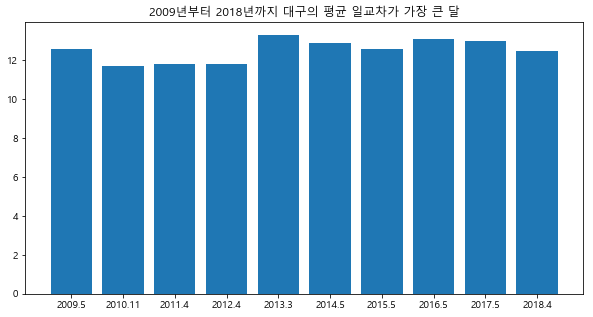

In [45]:
# 2019112801 우예빈
# 가장 추웠던 달과 가장 더웠던 달

import csv
import matplotlib.pyplot as plt

f= open('daegu.csv', 'r', encoding = 'euc_kr')
data = csv.reader(f)
header = next(data)

monthData = []
tempData = []
for row in data:
    year = row[0][0:4]
    if (int(year)>=2009)and(int(year)<=2018):
        if row[-1] !="" and row[-2]!="":
            if row[0][6] == ".":
                month = row[0][5]
            else:
                month = row[0][5:7]
            date = year+'.'+month
            temp =float(row[-1]) - float(row[-2])
            if date not in monthData:
                monthData.append(date)
                tempData.append([temp])
            else:
                index = monthData.index(date)
                tempData[index].append(temp)

f.close()
for i in range(len(tempData)):
    tempData[i] = round(sum(tempData[i])/len(tempData[i]), 1)

year_by_year = []
month_by_year = []
temp_by_year = []
for i in range(len(monthData)):
    if monthData[i][0:4] in year_by_year:
        indexing = year_by_year.index(monthData[i][0:4])
        temp_by_year[indexing].append(tempData[i])
        j = year_by_year.index(monthData[i][0:4])
        month_by_year[j].append(monthData[i])
    else:
        year_by_year.append(monthData[i][0:4])
        temp_by_year.append([tempData[i]])
        month_by_year.append([monthData[i]])

max_temp_by_year = []
max_month_by_year = []
for i in range(len(temp_by_year)):
    maxTemp = max(temp_by_year[i])
    max_temp_by_year.append(maxTemp)
    idx = temp_by_year[i].index(maxTemp)
    max_month_by_year.append(month_by_year[i][idx])
    
print("대구 월별 평균 일교차")
for i in range(len(max_temp_by_year)):
    print("{0}: {1}".format(max_month_by_year[i], max_temp_by_year[i]))
    
    
plt.figure(figsize=(10, 5))
plt.rc('font', family = 'Malgun Gothic')
plt.bar(max_month_by_year, max_temp_by_year)
plt.title("2009년부터 2018년까지 대구의 평균 일교차가 가장 큰 달")
plt.show()